<a href="https://colab.research.google.com/github/W3ndy42/E-news-Express/blob/main/Project_ENews_Express_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Business Statistics: E-news Express

## Define Problem Statement and Objectives


 Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.*** The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.***

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

**Objective**

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

Do the users spend more time on the new landing page than on the existing landing page?
Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
Does the converted status depend on the preferred language?
Is the time spent on the new page the same for the different language users?

**Data Dictionary**
The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

user_id - Unique user ID of the person visiting the website

group - Whether the user belongs to the first group (control) or the second group (treatment)

landing_page - Whether the landing page is new or old

time_spent_on_the_page - Time (in minutes) spent by the user on the landing

converted - Whether the user gets converted to a subscriber of the news portal or not

language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd
%matplotlib inline

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x) # To supress numerical display in scientific notations


## Reading the Data into a DataFrame

In [ ]:
# mounted Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df_news = pd.read_csv('/content/drive/MyDrive/DS_Projecs/abtest.csv').copy()


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
# return the first rows
df_news.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
# return the last 5 rows
df_news.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
# Looking into the shape of the dataset.
df_news.shape

(100, 6)

### Observations:
*   The dataset has 100 number of rows with 6 columns.



In [ ]:
# printing the summary of the DataFrame
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


### Observations:

*   The DataFrame has 6 columns. Data in each row correspond to data gatering from the e-news web page.
*   There are four columns with object datatype, one integer and one float.
*   We can conclude there is 2 numerical and 4 categorical columns in the dataset.



In [ ]:
# exploring the std summary of the data
df_news.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.00,546517.00,52.30,546443.00,546467.75,546492.50,546567.25,546592.00
time_spent_on_the_page,100.00,5.38,2.38,0.19,3.88,5.42,7.02,10.71


### Observations:


*   User_id: User id is an identifier variable.
*   Time spend on the page: Time spend on the page has a median of 5.38 and a maximum of 10.71 minutes, with standard derivation of 2.38.



In [ ]:
# looking for null values
df_news.isnull().sum().sum()

0

### Observations:


*   The dataset does not contain any null value.



In [ ]:
# checking for duplicates
df_news.duplicated().value_counts()

False    100
Name: count, dtype: int64

### Observations:

*   The dataset does not contain any diplicate data.

### Univariate Analysis

### Observations on Group

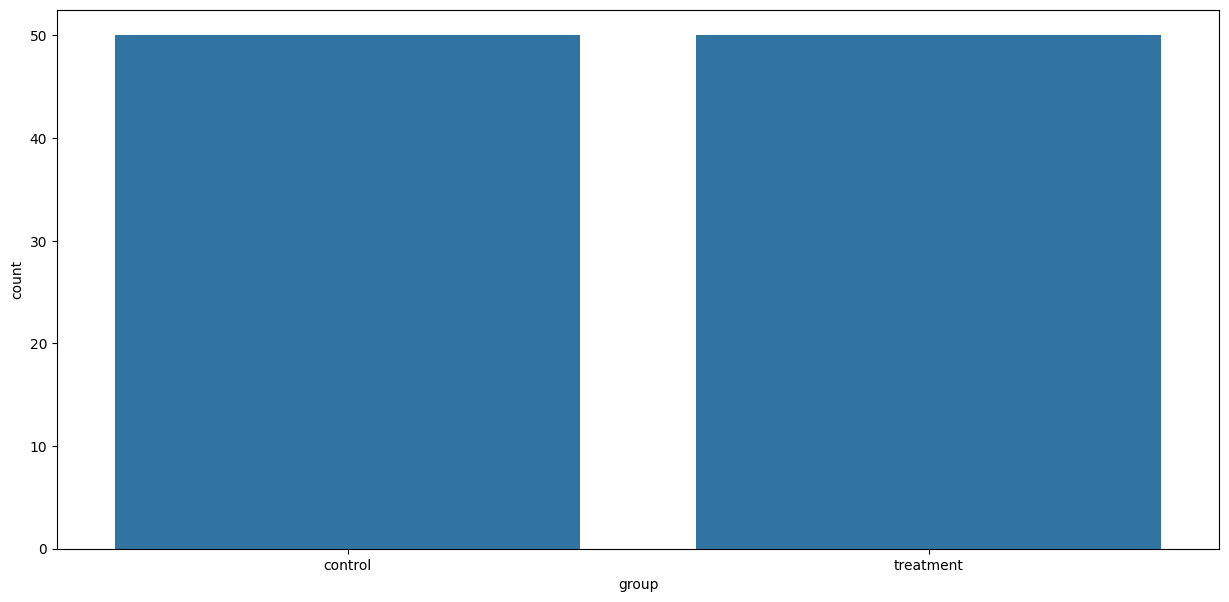

In [ ]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df_news, x=df_news['group']);
plt.show()

- We have 50 users in each group, making the sample size the same for all groups.

### Observations on Landing Page

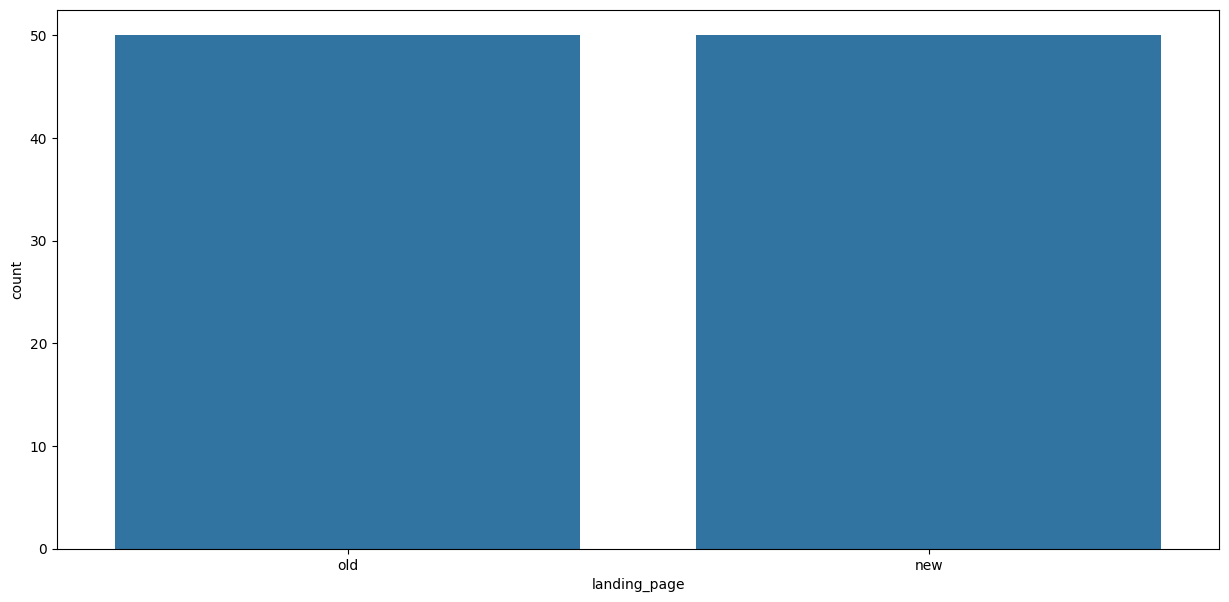

In [ ]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df_news, x=df_news['landing_page']);
plt.show()


* There are 50 users in each group.

### Observation on Coverted

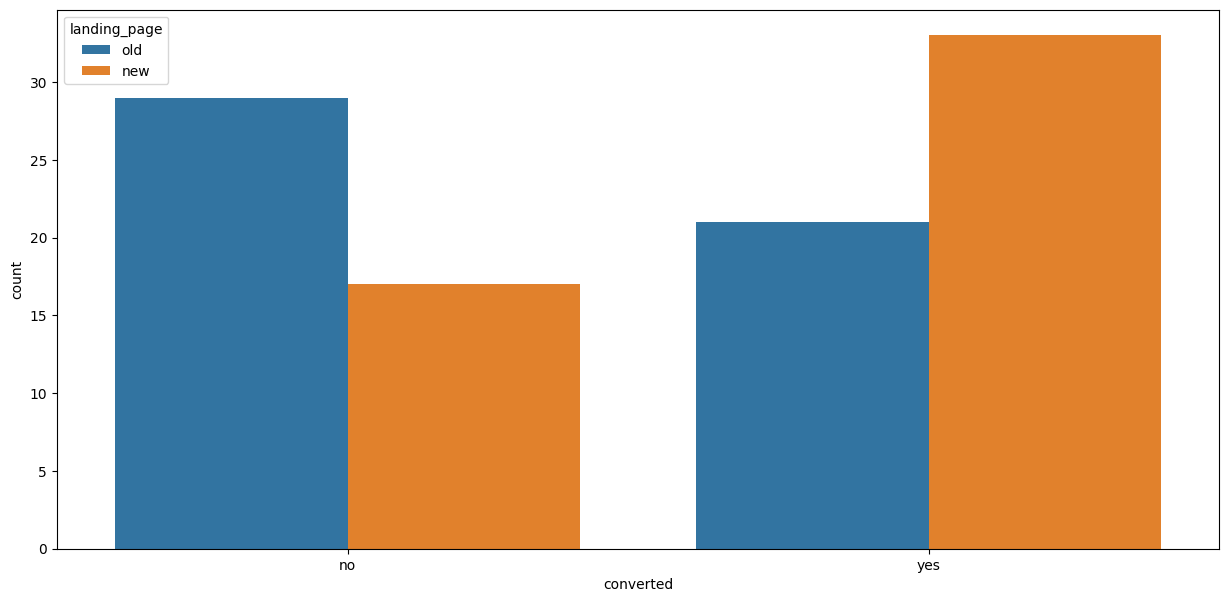

In [ ]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df_news, x=df_news['converted'], hue='landing_page');
plt.show()



*   Most visitors to the new website converted to subscribers, with over 30 sign-ups on the new landing page.


###Observations on Time Spend On The Page   

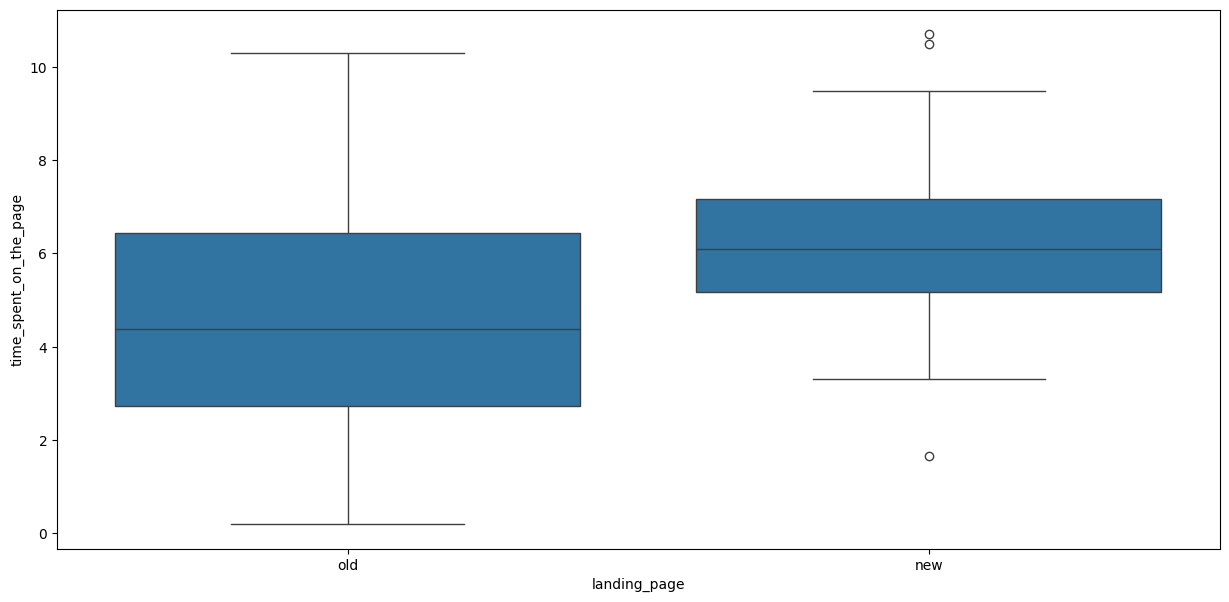

In [ ]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_news, x=df_news['landing_page'], y=df_news['time_spent_on_the_page']);
plt.show()

- There has been an increase in the time spent by the user on the new landing page.

### Observations on Language Preferred

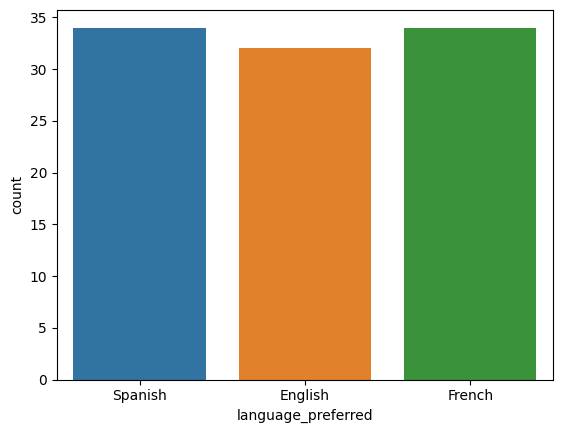

In [ ]:
sns.countplot(data=df_news, x=df_news['language_preferred'], palette='tab10', hue='language_preferred');
plt.show()

-There isn't much difference in the number of users who speak different languages.

### Bivariate Analysis

### Let's explore time spent on the page by group

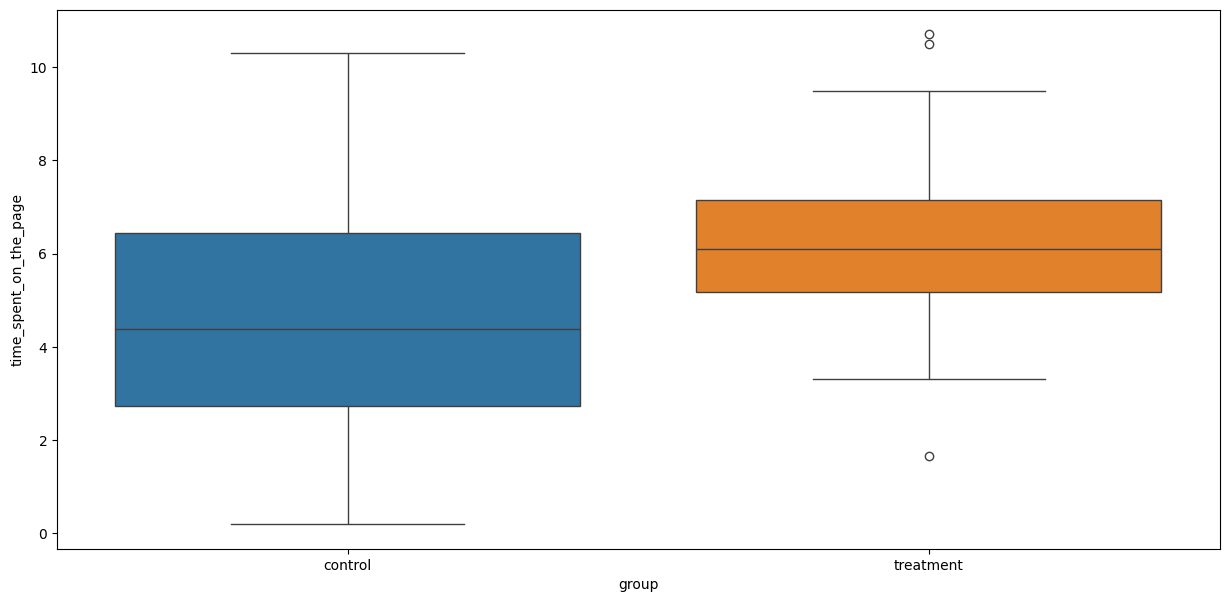

In [ ]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_news, x=df_news['group'], y=df_news['time_spent_on_the_page'], palette='tab10', legend=False, hue='group');
plt.show()

- It looks like the time spent on page by the user are greater in the treatment group.

### Lets check the check converted rate

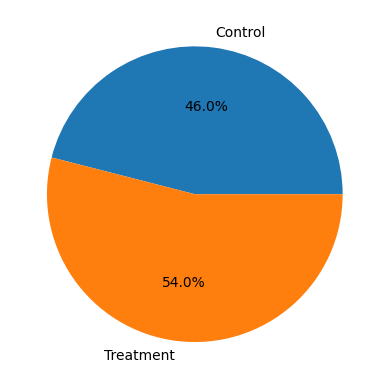

In [ ]:
lab =['Control','Treatment']
grouped = df_news.groupby(df_news['converted'] == 'yes');
plt.pie(data=grouped, labels=lab, x=grouped.converted.count(), autopct="%1.1f%%");
plt.show()

### Let's explore time spent on the page by the web page(landing_page)

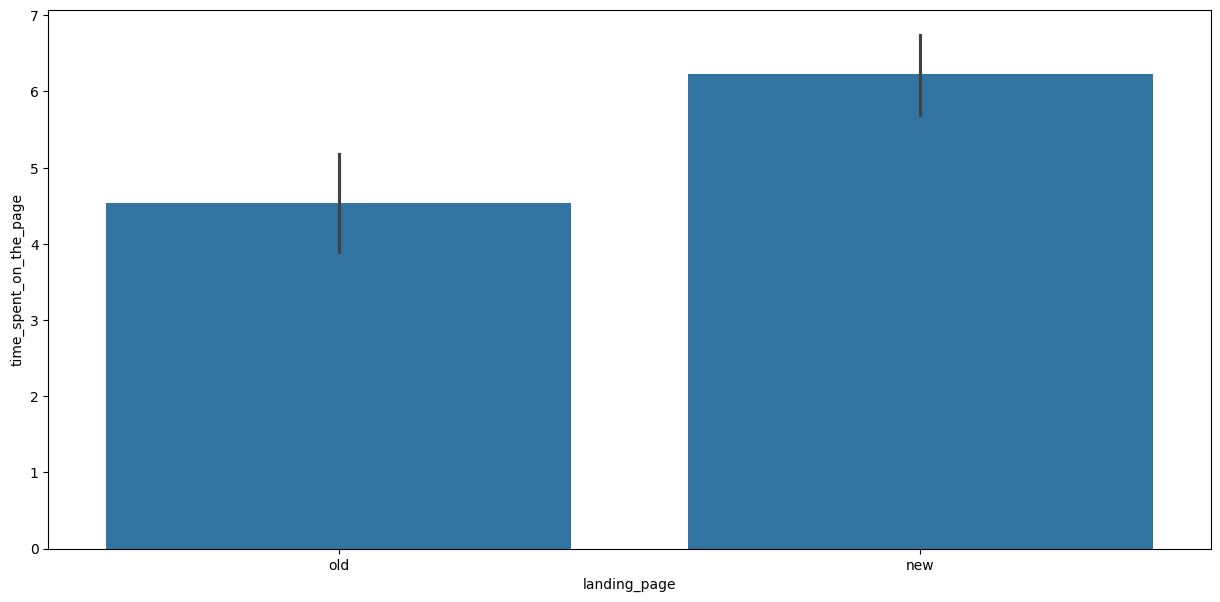

In [ ]:
plt.figure(figsize=(15, 7))
sns.barplot(data=df_news, x=df_news['landing_page'], y=df_news['time_spent_on_the_page']);
plt.show()

- It appears that the new landing page is more engaging than the old one, as users are spending more time on it.

### Lets check the check the spending time by Lenguage

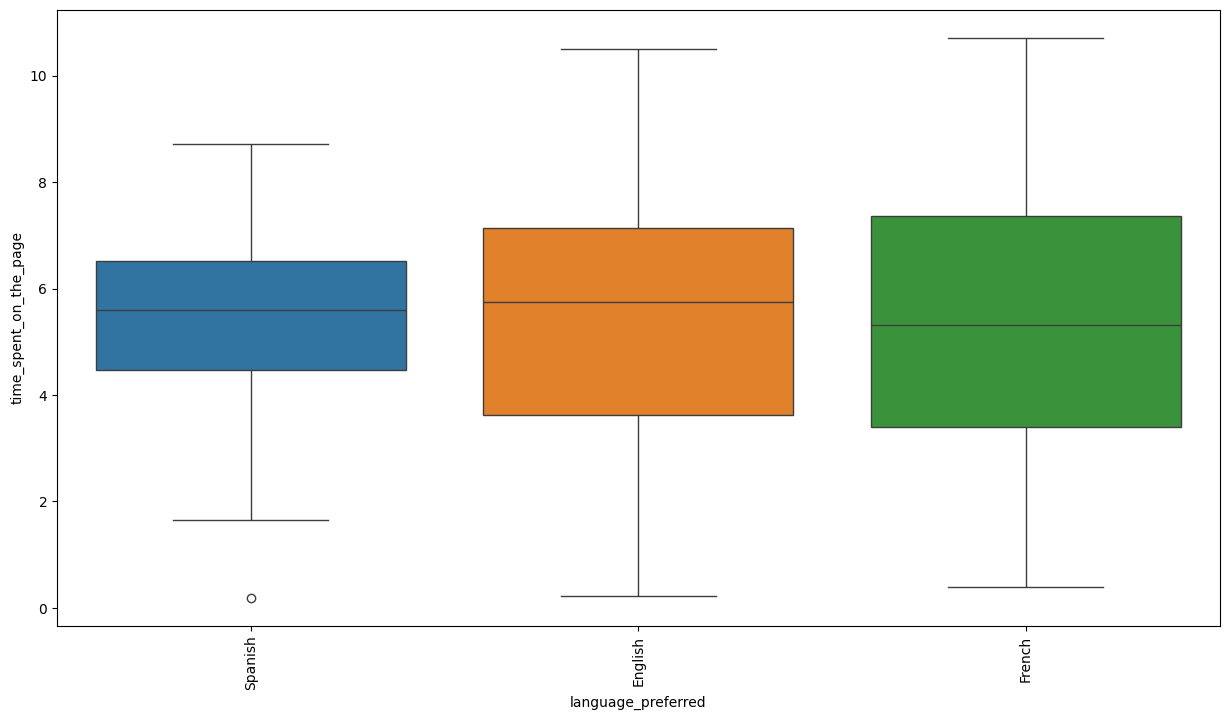

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_news, x=df_news['language_preferred'], y=df_news['time_spent_on_the_page'], palette='tab10',legend=False, hue=df_news['language_preferred'])
plt.xticks(rotation=90);
plt.show()

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

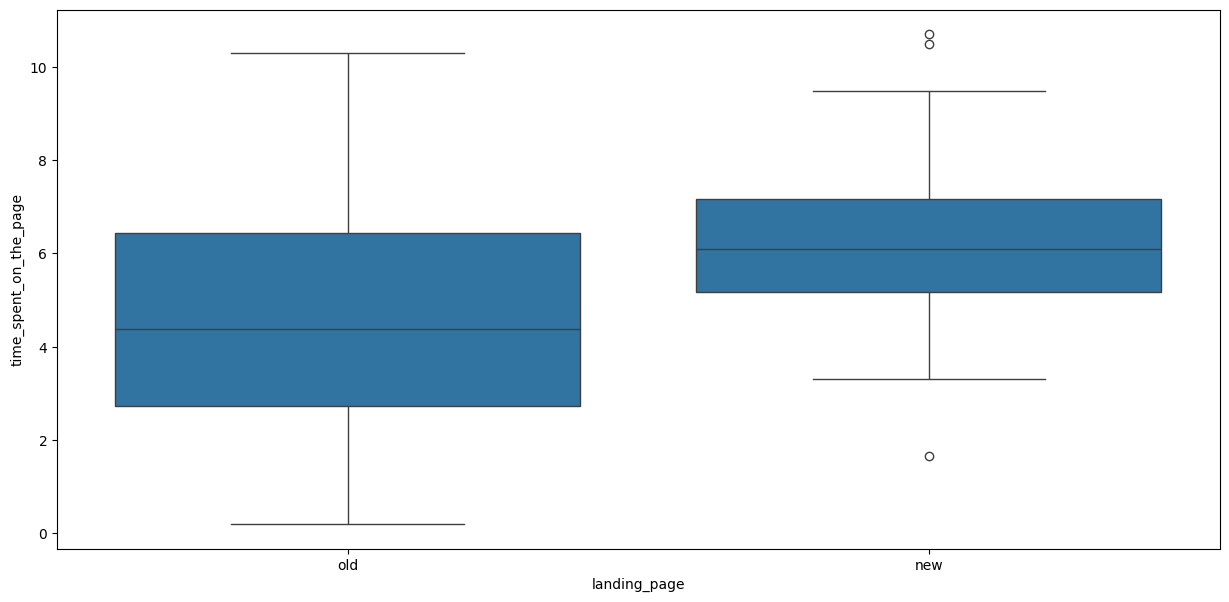

In [ ]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_news, x=df_news['landing_page'], y=df_news['time_spent_on_the_page']);
plt.show()

- It appears that the new landing page is more engaging than the old one, as users are spending more time on it.

### Step 1: Define the null and alternate hypotheses

Let's frame the null and alternative hypotheses based on the above claim can be formulated as:


> $H_0:$ The mean time spent by a user on the new landing page is equal to the old landing page.

> $H_a:$ The mean time spent by a user on the new landing page is higher than the old page.

Mathematically, the above formulated hypotheses can be written as:


>$H_0:$ $P_B$ = $P_A$ <br>
$H_a:$ $P_B$  >  $P_A$ <br>

Where The mean time spent by a user on the old landing page is represented by $P_A$, and in the new landing page as $P_B$.


### Step 2: Select Appropriate test

This is a case of a one-tailed test for the significance of a two means. As the population standard deviation is unknown, a 2-sample ind t-test will be appropriate to test the formulated hypotheses.

Let's test whether the T-test assumptions are satisfied or not

Continuous data - Yes, the usage time is measured on a continuous scale.

Independent populations - As we are taking random samples for two different type of users, the two samples are from two independent populations.

Equal population standard deviations - As the sample standard deviations are almost equal, the population standard deviations may be assumed to be equal.

Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

We are provided that the sample is randomly selected and we assume that it has come from a normally distributed population.

### Step 3: Decide the significance level

Let's set the level of significane (alpha) as 0.05

### Step 4: Collect and prepare data

In [ ]:
#Let's check the mean and standard derivation of the sampling data.

time_spend_group_A = df_news[df_news['group'] == 'control']['time_spent_on_the_page']
time_spend_group_B = df_news[df_news['group'] == 'treatment']['time_spent_on_the_page']

print('The mean of time spend on the page for group A is ' + str(round(time_spend_group_A.mean(), 2)))
print('The mean of time spend on the page for group B is ' + str(round(time_spend_group_B.mean(), 2)))

print('The std of time on the page for group A is ' + str(round(time_spend_group_A.std(), 2)))
print('The std of time on the page for group B is ' + str(round(time_spend_group_B.std(), 2)))

The mean of time spend on the page for group A is 4.53
The mean of time spend on the page for group B is 6.22
The std of time on the page for group A is 2.58
The std of time on the page for group B is 1.82


### Step 5: Calculate the p-value

In [ ]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(time_spend_group_B, time_spend_group_A, equal_var = True, alternative = 'greater')
print('The p-value is ', p_value)


The p-value is  0.0001316123528095005


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001316123528095005 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is less than the significance level (5%), we reject the null hypothesis. Hence, we have enough statistical evidence to say that the mean time spent by the user on the new landing page(B) is greater than the time spent on the old landing page(A).

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual *Analysis*

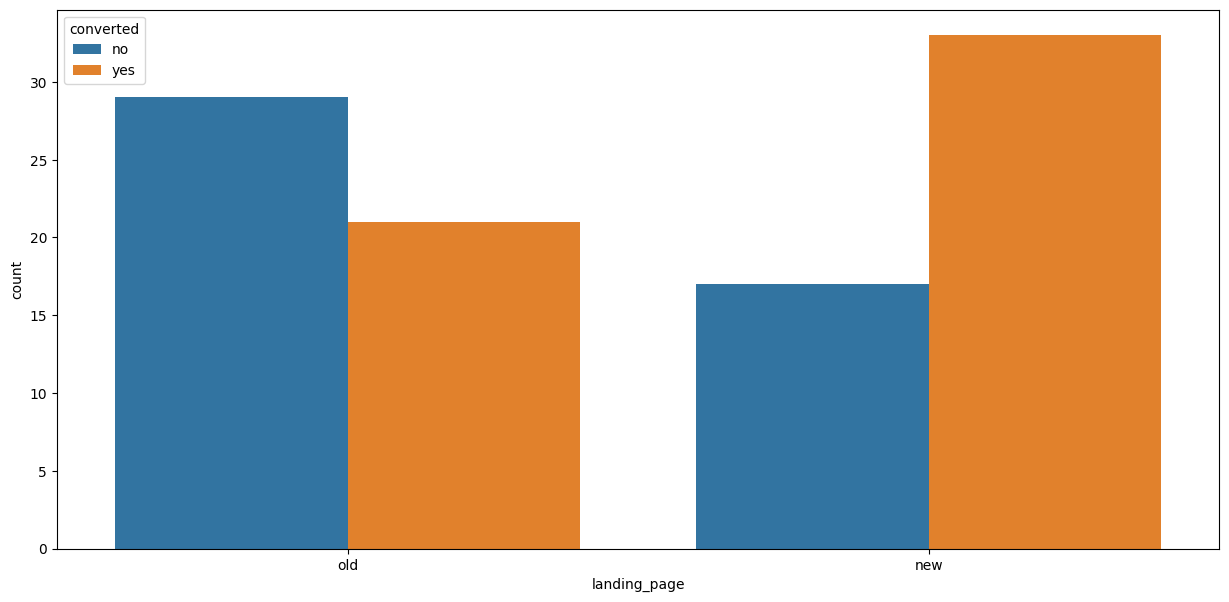

In [ ]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df_news, x='landing_page', palette='tab10', hue='converted');
plt.show()

### Step 1: Define the null and alternate hypotheses

> $H_0:$ The convertion rate in the new landing page is equal than the old landing page.

> $H_a:$ The convertion rate on the new landing page are greater than the old landing page.

Mathematically, the above formulated hypotheses can be written as:

$H_0:$ $P_B$ = $P_A$ <br>
$H_a:$ $P_B$  >  $P_A$ <br>

Where the convertion rate to subscribers in the control group(old landing page) is represented by $P_A$, and in the experimental (new landing page) as $P_B$.

### Step 2: Select Appropriate test

This is a case of a two proportions Z-Test. We need to compare proportions of two groups to test the formulated hypotheses.

Let's test whether the proportions-ztest assumptions are satisfied or not

Comparison of proportions - Yes, we have two groups to be compared in proportions.

Independent populations - As we are taking random samples for two different type of users, the two samples are from two independent populations.

Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

We are provided that the sample is randomly selected and we assume that it has come from a normally distributed population and binary data.

### Step 3: Decide the significance level

Let's set the level of significane (alpha) as 0.05

### Step 4: Collect and prepare data

In [ ]:
#Let's check the mean and standard derivation of the sampling data.

converted_group_A = df_news[(df_news['converted'] == 'yes') & (df_news['landing_page'] == 'old')].count()[0]
converted_group_B = df_news[(df_news['converted'] == 'yes') & (df_news['landing_page'] == 'new')].count()[0]

print('Converted users on the old landing page is: '+ str(converted_group_A))
print('Converted users on the new landing page is: '+ str(converted_group_B))


Converted users on the old landing page is: 21
Converted users on the new landing page is: 33


### Step 5: Calculate the p-value

In [ ]:
#import the required functions
from statsmodels.stats.proportion import proportions_ztest
# find the p-value
test_stat, p_value = proportions_ztest(count= [converted_group_B, converted_group_A], nobs=[50,50], value=0, alternative = 'larger')
print('The p-value is ', p_value)


The p-value is  0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference


We reject the null hypothesis since the p-value is less than the significance level (5%). Hence, we have enough statistical evidence to say that the conversion rate by the user on the new landing page(B) is greater than the conversion rate on the old landing page(A).

## 3.- Is the conversion and preferred language are independent or related?

### Perform Visual *Analysis*

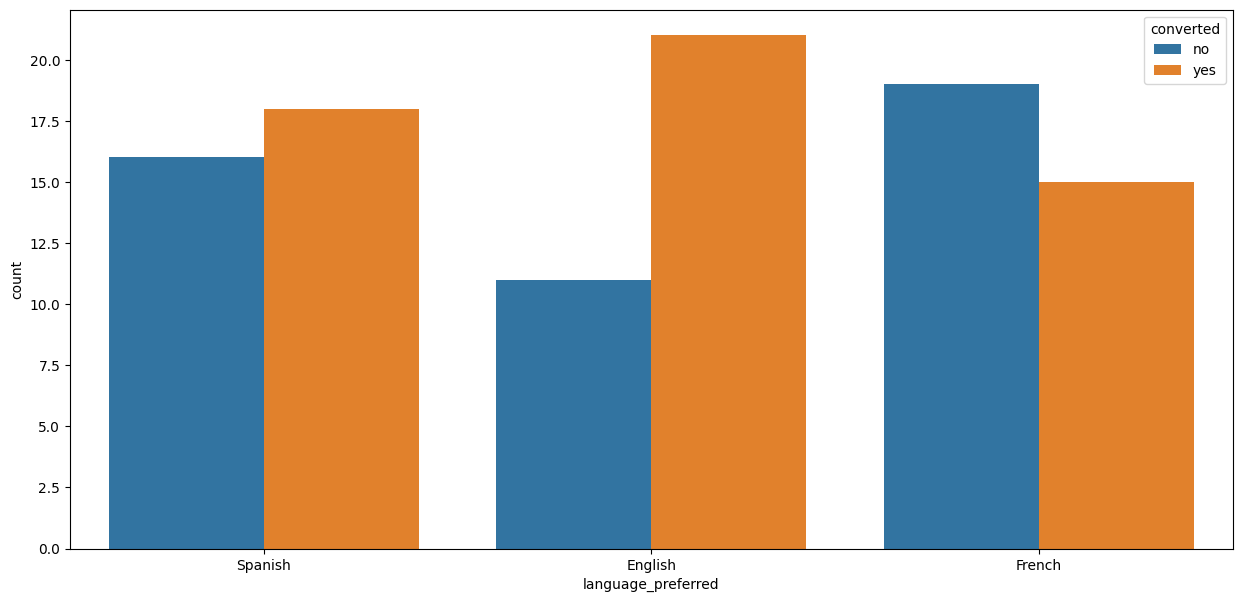

In [ ]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df_news, x=df_news['language_preferred'], palette='tab10', hue='converted');
plt.show()

- After analyzing the data, it was discovered that a higher number of English speakers were converted.

### Step 1: Define the null and alternate hypotheses

> $H_0:$ The convertion and prefere language variables are independient.

> $H_a:$ The convertion and prefere language variables are not independient.

### Step 2: Select Appropriate test

This is a case of chi-Square Test of independence. We need to check wherever the categorical variable from apopulation are independiente.

 Categorical variables - Yes

 Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.

Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

### Step 3: Decide the significance level

Let's set the level of significane (alpha) as 0.05

### Step 4: Collect and prepare data

In [ ]:

contingency_table = pd.crosstab(df_news['converted'], df_news['language_preferred'])
print(contingency_table)


language_preferred  English  French  Spanish
converted                                   
no                       11      19       16
yes                      21      15       18


### Step 5: Calculate the p-value

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

#Create a contingency table
contingency_table = pd.crosstab(df_news['converted'], df_news['language_preferred'])

chi, p_value, dof, expected = chi2_contingency(contingency_table)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference


We fail to reject the null hypothesis since the p-value is grater than the significance level (5%). Hence, we have not enough statistical evidence to say that the conversion rate and the prefered lenguage are independient.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

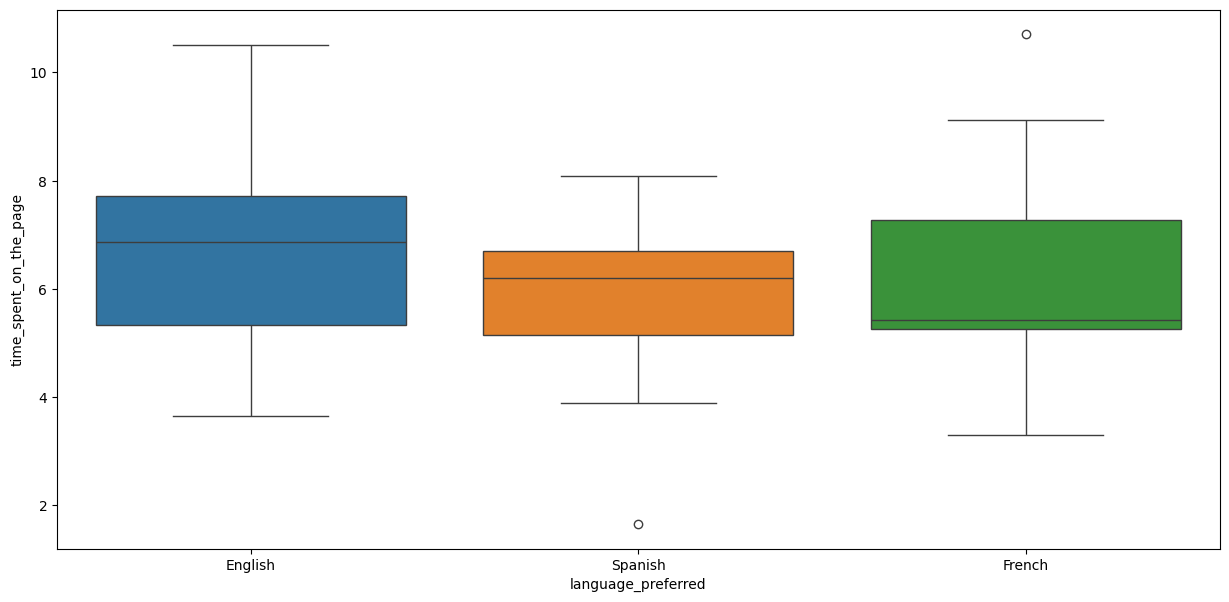

In [ ]:
new_df = df_news[df_news['landing_page']=='new']

plt.figure(figsize=(15, 7))
sns.boxplot(data=new_df, x=new_df['language_preferred'], y=new_df['time_spent_on_the_page'], palette='tab10', hue='language_preferred');
plt.show()

- After analyzing the data, it appears that users who speak English spend more time on the new landing page.

### Step 1: Define the null and alternate hypotheses

>$H_0: \mu_1 = \mu_2 = \mu_3$

>$H_a: $ At least one the differents lenguages is different from the rest.


### Step 2: Select Appropriate test

We will use ANOVA Test to compere the sample means from independent populations.

Let's check whether the ANOVA assumptions are satisfied or not

Independence: Yes, the observations within each group are independent of each other. In other words, the data points are not influenced by each other.

Normality: Yes, the data within each group should be approximately normally distributed. This assumption is more critical for smaller sample sizes. You can visually check for normality using histograms or statistical tests like the Shapiro-Wilk test.

Homogeneity of Variances (Homoscedasticity):Yes, the variances of the populations from which the samples are drawn should be approximately equal.

Homogeneity of Groups:  Each group should have a similar sample size.

### Step 3: Decide the significance level


Let's set the level of significane (alpha) as 0.05

### Step 4: Collect and prepare data

Now, the normality and equality of variance assumptions need to be checked.

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spend on the new page follows a normal distribution.

>$H_a:$ Time spend on the new page does not follow a normal distribution

In [ ]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(new_df['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [ ]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( new_df['time_spent_on_the_page'][new_df['language_preferred']=="English"],
                                   new_df['time_spent_on_the_page'][new_df['language_preferred']=="Spanish"],
                                   new_df['time_spent_on_the_page'][new_df['language_preferred']=="French"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


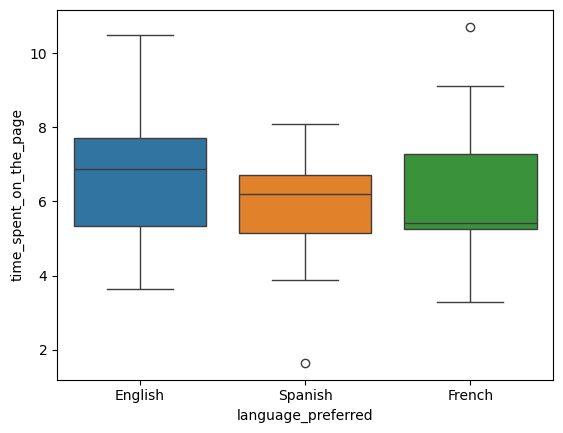

In [ ]:
# checking the mean time spend in the new page by the user for each lenguage
# = df_news.loc[df_news['landing_page']=='new']

mEnglish = new_df[new_df['language_preferred'] == 'English']['time_spent_on_the_page']
mSpanish = new_df[new_df['language_preferred'] == 'Spanish']['time_spent_on_the_page']
mFrench  = new_df[new_df['language_preferred'] == 'French']['time_spent_on_the_page']

sns.boxplot(data=new_df, x=new_df['language_preferred'], y=new_df['time_spent_on_the_page'], palette='tab10', hue='language_preferred');
plt.show()

- English speakers spend more time on the web page compared to the other two groups.

### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import  f_oneway
#Calculating one way ANOVA test
f_statistics, p_value = f_oneway(mEnglish, mSpanish, mFrench)
print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference


We fail to reject the null hypothesis since the p-value is grater than the significance level (5%). Hence, we have not enough statistical evidence to say that the time spent on the new landing page is different for differents language users.

## Conclusion and Business Recommendations

* There is statistical evidence that users have bether engagement in the new landing page.
* It appears that English-speaking users are spending more time on the website.
* The convertion rate of users to subscribers are higther in the new landing page.
* We have not enough statistical evidence to say that the time spent on the new landing page is different for differents language users.

### Business Recomendations
* The advice for E-news is to adopt the new Website since the users seem more engaged.
* I recommend carrying out further surveys to gain a better understanding of the preferences of Spanish and French-speaking users. This will assist us in identifying whether they are dissatisfied with our content or if we need to make it more inclusive in terms of language or Content type.

___